# Movie Recommender System

In this project, i embarked on a new type of project outside of my familiar skills. I never build a recommender system and the reason of why i want to learn this project it's because i just failed my job interview because the interviewer asked me what methodology will you use for ranking the recommendation system and i have no idea. Therefore i need to learn from the bottom-up.


--


**The purpose** of this project is to implement all the tool and familiar with the system for recommendation system 

**The Goal** of this project is to create a model that are able to recommend an accurate film for the user based on their liking. 

## **About The Data**

 This dataset describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

 Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

### Links Dataset

| Variable | Description                         |
|----------|-------------------------------------|
| movieId  | Unique ID for each movie            |
| imdbId   | IMDB ID of the movie                |
| tmdbId   | TMDB ID of the movie                |

### Movies Dataset

| Variable | Description                                          |
|----------|------------------------------------------------------|
| movieId  | Unique ID for each movie                             |
| title    | The title of the movie, with release year in parenthesis |
| genres   | Pipe-separated list of genres for the movie          |

### Ratings Dataset

| Variable  | Description                                         |
|-----------|-----------------------------------------------------|
| userId    | The ID of the user                                  |
| movieId   | Unique ID for each movie (links to the Movies table) |
| rating    | The rating given to the movie by the user           |
| timestamp | Time the movie was rated (UTC)                      |

### Tags Dataset

| Variable  | Description                                          |
|-----------|-----------------------------------------------------|
| userId    | The ID of the user                                  |
| movieId   | Unique ID for each movie (links to the Movies table) |
| tag       | User-generated tag for the movie                    |
| timestamp | Time the tag was applied (UTC)                       |


## **Import & Loading**

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

In [40]:
# Merging the datasets together based on 'movieId' and 'userId'
df_ratings = pd.read_csv('ratings.csv')
df_links = pd.read_csv('links.csv')
df_tags = pd.read_csv('tags.csv')
df_movies = pd.read_csv('movies.csv')

In [41]:
# Merging the datasets together based on 'movieId' and 'userId'
df = pd.merge(df_ratings, df_links, on='movieId')
df = pd.merge(df_ratings, df_tags, on='movieId')
df = pd.merge(df_ratings, df_movies, on='movieId')


In [42]:
df.head(2)  

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [27]:
# drop the columns that are ended with '_y'
df = df.drop(df.filter(regex='_y$').columns.tolist(),axis=1)

In [29]:
# Rename the columns that are ended with '_x' to remove the '_x'
df.rename(columns=lambda x: x.replace('_x', ''), inplace=True)

In [43]:
df.shape

(100836, 6)

In [31]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
imdbId       0
tmdbId       0
tag          0
title        0
genres       0
dtype: int64

In [32]:
# Describe the dataset
df.describe()

,userId,movieId,rating,timestamp,imdbId,tmdbId
count,233213.000000,233213.000000,233213.000000,2.332130e+05,2.332130e+05,233213.000000
mean,309.688191,12319.999443,3.966535,1.213524e+09,2.610632e+05,9378.277742
std,178.206387,28243.919401,0.968637,2.250448e+08,4.414411e+05,36943.139800
min,1.000000,1.000000,0.500000,8.281246e+08,1.234900e+04,11.000000
25%,156.000000,296.000000,3.500000,1.017365e+09,1.103570e+05,278.000000
50%,309.000000,1198.000000,4.000000,1.217325e+09,1.109120e+05,680.000000
75%,460.000000,4638.000000,5.000000,1.443201e+09,1.724950e+05,1892.000000
max,610.000000,193565.000000,5.000000,1.537799e+09,5.580390e+06,503475.000000


In [33]:
#Check Duplicate Values
df.duplicated().sum()

13807

## **EDA**

Before building a recommender system with the MovieLens dataset, it's essential to understand the data by visualizing different aspects. Visualization helps in uncovering underlying patterns, outliers, and insights that can inform the design and effectiveness of our recommender system. We'll focus on the following key aspects:

1. **Rating Distribution**  
   *Objective*: Understand the distribution of ratings across all movies.  
   *Method*: Plotting the frequency of each rating.

2. **Number of Ratings per Movie**  
   *Objective*: Identify how many ratings each movie received.  
   *Method*: Histogram showing the distribution of the number of ratings per movie.

3. **Number of Ratings per User**  
   *Objective*: Observe how many ratings each user has given.  
   *Method*: Histogram showing the distribution of the number of ratings per user.

4. **Genre Popularity**  
   *Objective*: Find out which genres are rated most frequently.  
   *Method*: Bar chart showing the number of ratings for each genre.

### **Rating Distribution**
This will show how frequently each rating is given across all movies.

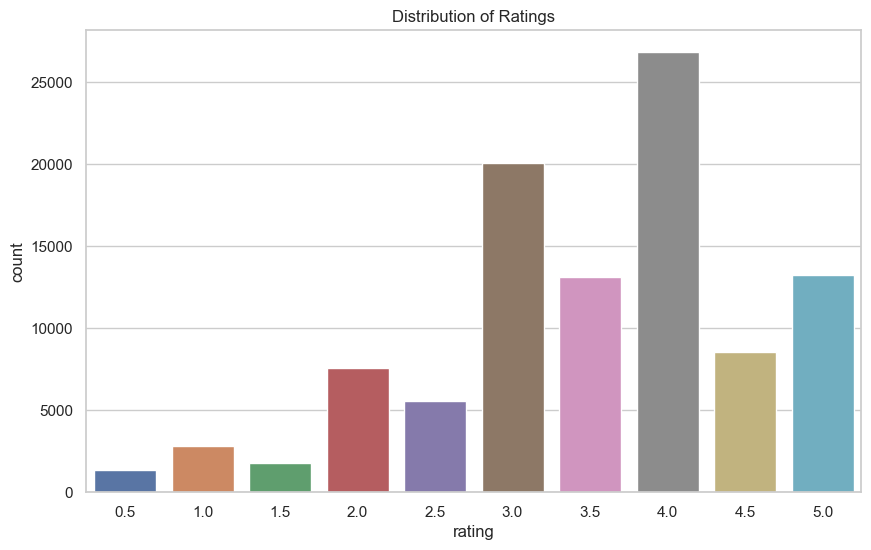

In [44]:
# Setting aesthetic parameters for seaborn
sns.set(style='whitegrid')

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

This bar chart illustrates the distribution of movie ratings. We can observe that:

- The most common rating is 4.0, indicating a trend where users are likely to rate movies they feel positively about.
- Lower ratings (0.5 to 2.0) are less frequent, which may suggest that users prefer to rate movies they like rather than ones they dislike.
- The rating values are discrete, centered around half-integer values, which is consistent with the rating system that allows half-star increments.


### **Number of Rating per Movie**
This will give an idea about the movies that are most frequently rated, which indicates popularity or viewer engagement.

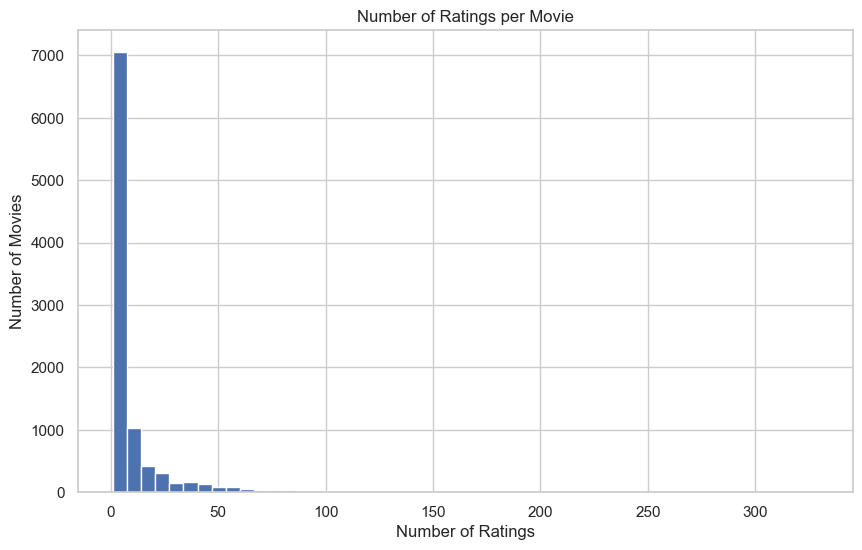

In [45]:
# Calculate the number of ratings per movie
ratings_per_movie = df['movieId'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_movie.values, bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

The histogram shows the number of ratings per movie:

- A large number of movies have very few ratings, as indicated by the spike at the left side of the histogram.
- A small number of movies have a very high number of ratings, suggesting these are very popular or cult classics that engage a large number of users.
- This distribution is highly skewed, with a long tail to the right, which is typical in movie rating datasets where many movies are rarely rated, while a few are rated very frequently.


### **Number of Rating per User**
This will show how active each user is in terms of rating movies.

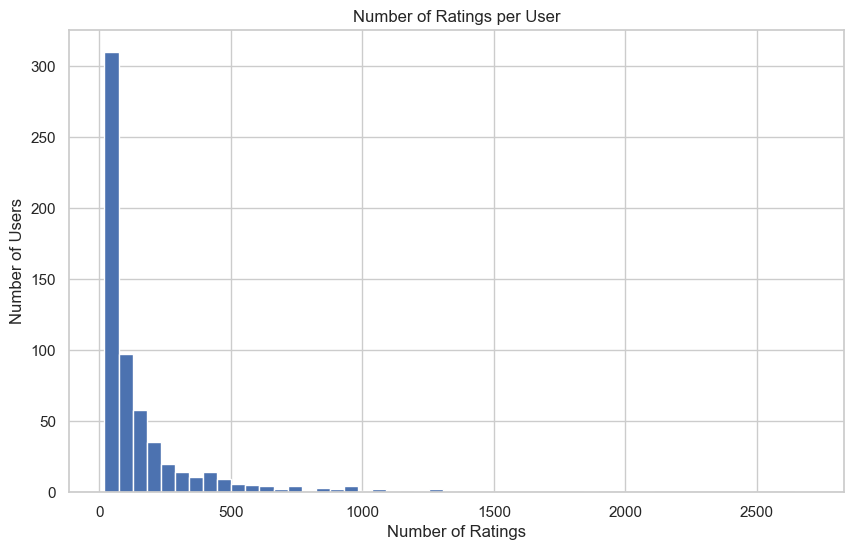

In [47]:
# Calculate the number of ratings per user
ratings_per_user = df['userId'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_user.values, bins=50)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

This histogram details the number of ratings given by each user:

- Most users rate a relatively small number of movies, as seen by the tall bar on the left.
- There are some highly active users who rate hundreds or even thousands of movies, but they are exceptions.
- The distribution is skewed to the right, indicating that movie rating behavior is very diverse among users, with most being casual raters and a few being extremely active.


### **Genre Popularity**
This will show which genres are most popular among users based on the number of ratings.

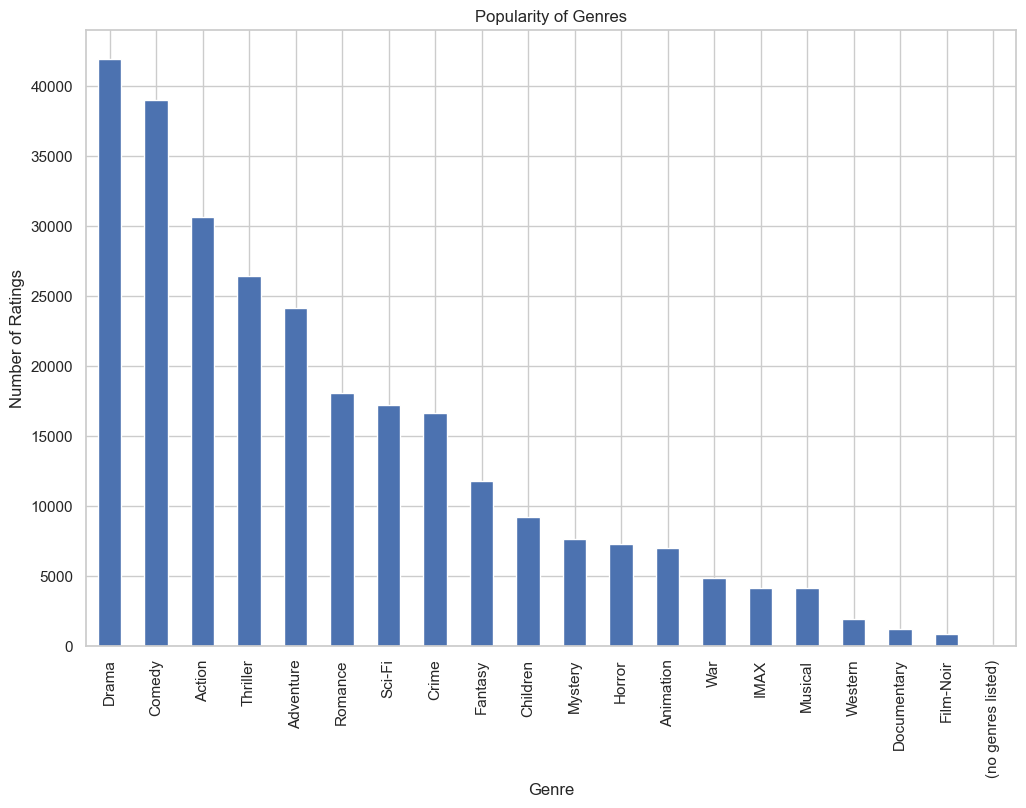

In [48]:
# Splitting the genres and exploding the 'genres' column
genre_data = df.assign(genres=df['genres'].str.split('|')).explode('genres')

# Counting the number of ratings per genre
genre_popularity = genre_data['genres'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
genre_popularity.plot(kind='bar')
plt.title('Popularity of Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.show()

The bar chart displays the popularity of genres based on the number of ratings:

- Drama and Comedy are the most popular genres, receiving the highest number of ratings, which indicates wide appeal and acceptance.
- Action, Thriller, and Adventure also receive a significant number of ratings, suggesting a solid user base for these genres.
- Documentary, War, and Film-Noir have fewer ratings, which may indicate a more niche audience or less overall viewer interest in these categories within the dataset's user base.

## **Handling Outliers**

**Purpose of Analysis:** For a recommender system, we may want to keep the outliers if they represent genuine user preferences, as this could be valuable information. For example, a user who rates movies much lower than average might have a unique taste that the system should learn from.

## **Setting Thresehold**

Decide on the minimum number of ratings per movie and per user. This is a subjective choice, but a common practice is to look at the percentiles (e.g., 5th percentile for movies and 95th percentile for users) to determine a cut-off point.


- **Filter Data** : Remove movies with fewer ratings than the movie threshold and users with fewer ratings than the user threshold from the dataset

- **Recreate User-Item Matrix**: After filtering, create a new-user item metric the reduced 

In [62]:
# Set thresholds
min_movie_ratings = 10  # example threshold for movies
min_user_ratings = 10   # example threshold for users

In [65]:
# Filter movies and users based on the thresholds
filtered_movies = df['movieId'].value_counts() > min_movie_ratings
filtered_users = df['userId'].value_counts() > min_user_ratings


In [59]:
# Filter the original DataFrame based on the filtered movies and users
ratings_filtered = df[
    (df['movieId'].isin(filtered_movies[filtered_movies].index)) & 
    (df['userId'].isin(filtered_users[filtered_users].index))
]

In [61]:
# Recreate the user-item matrix with the filtered data
user_item_matrix_filtered = ratings_filtered.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

In [66]:
# As an example, let's implement a simple collaborative filtering model using cosine similarity.
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
# Step 2: Compute the cosine similarity matrix
# Note: This could be computationally intensive depending on the size of the matrix
item_similarity_matrix = cosine_similarity(user_item_matrix_filtered.T)

In [71]:
# Convert the similarity matrix to a DataFrame for better handling
item_similarity_df = pd.DataFrame(item_similarity_matrix, index=user_item_matrix_filtered.columns, columns=user_item_matrix_filtered.columns)



In [72]:
def recommend_movies(movie_id, similarity_df, items_df, k=5):
    """
    Recommends k most similar movies based on the movie_id.
    
    :param movie_id: int, the movie ID to base recommendations on
    :param similarity_df: DataFrame, item similarity matrix as a DataFrame
    :param items_df: DataFrame, contains the metadata of the items/movies
    :param k: int, the number of recommendations to return
    :return: list of movie IDs representing the recommended items
    """
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = similarity_df[movie_id]
    
    # Sort the movies based on the similarity scores
    sim_scores = sim_scores.sort_values(ascending=False)
    
    # Get the scores of the k most similar movies
    top_movie_ids = sim_scores.iloc[1:k+1].index.tolist()
    
    # Return the top k most similar movies
    return items_df.loc[top_movie_ids]['title'].tolist()

In [74]:
# For demonstration, let's use this function to recommend movies similar to movie with ID 1
recommendations = recommend_movies(1, item_similarity_df, df, k=5)

recommendations

['Seven (a.k.a. Se7en) (1995)',
 'Heat (1995)',
 'Fugitive, The (1993)',
 'Grumpier Old Men (1995)',
 'Batman (1989)']


The `recommend_movies` function is at the core of our recommender system. It operates on the premise of item-based collaborative filtering, where we recommend items similar to a particular item based on user preferences. Here's a step-by-step explanation:

1. **Input**: The function takes four parameters:
   - `movie_id`: The ID of the movie for which we want to find similar movies.
   - `similarity_df`: A precomputed DataFrame that contains the item similarity matrix.
   - `items_df`: A DataFrame containing metadata about the items, such as movie titles.
   - `k`: The number of similar movies to recommend.

2. **Process**:
   - The function retrieves similarity scores for all movies from the similarity DataFrame, relative to the specified `movie_id`.
   - It then sorts these scores in descending order to find the most similar movies.
   - The top `k` similar movie IDs are identified (excluding the movie itself, hence `iloc[1:k+1]`).

3. **Output**:
   - It returns a list of titles for the top `k` similar movies.

This function is versatile and can be used to generate recommendations for any movie in our dataset, providing users with a personalized movie-watching experience.

**Next Steps**

With our recommender system taking shape, the next steps will be to evaluate its performance using metrics like RMSE and to set up a validation process. We will also explore model tuning and iterative improvements to enhance the quality of our recommendations.

## **Model Tuning**
 Adjust your recommender system's parameters to improve its predictions. This could involve changing the similarity metric in collaborative filtering or the features used in content-based filtering.

### User Item Matrix - Training

In [76]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_filtered , test_size=0.2, random_state=42)

# Create a user-item matrix for the training data
train_user_item_matrix = train_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

### User Item Matrix - Testing

Next, we create user-item matrices for both training and testing sets. These matrices are essential for calculating the cosine similarity between items:

In [77]:
# Similarly, create a user-item matrix for the testing data
test_user_item_matrix = test_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

### Cosine Similarity Matrix 
We compute a cosine similarity matrix for the items using the training data, which serves as the basis for our recommendations:

In [78]:
# Compute the cosine similarity matrix for the training data
train_item_similarity_matrix = cosine_similarity(train_user_item_matrix.T)

# Convert the similarity matrix to a DataFrame for easier access
train_item_similarity_df = pd.DataFrame(train_item_similarity_matrix, 
                                        index=train_user_item_matrix.columns, 
                                        columns=train_user_item_matrix.columns)

### Function to Evaluate Recommender System

To evaluate our recommender system, we've created an evaluate_recommender function that calculates the Root Mean Square Error (RMSE) between predicted and actual ratings:

In [79]:
def evaluate_recommender(predictions, actuals):
    """
    Evaluates the recommender system by comparing the predicted and actual ratings.
    
    :param predictions: DataFrame, predicted ratings
    :param actuals: DataFrame, actual ratings
    :return: float, evaluation metric such as RMSE
    """
    # Flatten the predictions and actuals DataFrames
    predictions_flattened = predictions.to_numpy().flatten()
    actuals_flattened = actuals.to_numpy().flatten()
    
    # Calculate RMSE
    mse = ((predictions_flattened - actuals_flattened) ** 2).mean()
    rmse = np.sqrt(mse)
    
    return rmse

### Function to Predict Ratings Based on Similarity

We also implement a predict_ratings function to predict ratings for all user-item pairs based on the item similarity matrix:

In [80]:
def predict_ratings(similarity_df, user_item_matrix):
    """
    Predicts ratings for all user-item pairs.
    
    :param similarity_df: DataFrame, item similarity matrix as a DataFrame
    :param user_item_matrix: DataFrame, user-item matrix
    :return: DataFrame, predicted ratings
    """
    # Predict ratings
    ratings_predictions = user_item_matrix.dot(similarity_df) / np.array([np.abs(similarity_df).sum(axis=1)])
    
    return ratings_predictions

### Predict Ratings

In [81]:
# Predict ratings for the test set
test_predictions = predict_ratings(train_item_similarity_df, test_user_item_matrix)

### Evaluate 

In [82]:
rmse = evaluate_recommender(test_predictions, test_user_item_matrix)
print(f"RMSE of the recommender system: {rmse}")

RMSE of the recommender system: 0.7722718449857257


### **Model Optimisation**

In [84]:
from sklearn.metrics.pairwise import pairwise_distances

# Using Pearson correlation instead of cosine similarity
train_item_correlation_matrix = 1 - pairwise_distances(train_user_item_matrix.T, metric='correlation')
train_item_correlation_df = pd.DataFrame(train_item_correlation_matrix, 
                                         index=train_user_item_matrix.columns, 
                                         columns=train_user_item_matrix.columns)

# Predict ratings for the test set
test_predictions = predict_ratings(train_item_correlation_df, test_user_item_matrix)

In [85]:
# Evaluate the performance of the recommender system
rmse = evaluate_recommender(test_predictions, test_user_item_matrix)
print(f"RMSE of the recommender system: {rmse}")


RMSE of the recommender system: 0.7603137179814875


### **Cross Validation**

In [86]:
# Example: Save the model to disk
import joblib
joblib.dump(train_item_similarity_df, 'item_similarity_model.pkl')

['item_similarity_model.pkl']

In [92]:
# Monitor performance and update the model as new data comes in
# Example: Load the model and update it with new data
train_item_similarity_df = joblib.load('item_similarity_model.pkl')
# Update the model with new data here

RMSE of the recommender system: 0.7722718449857257


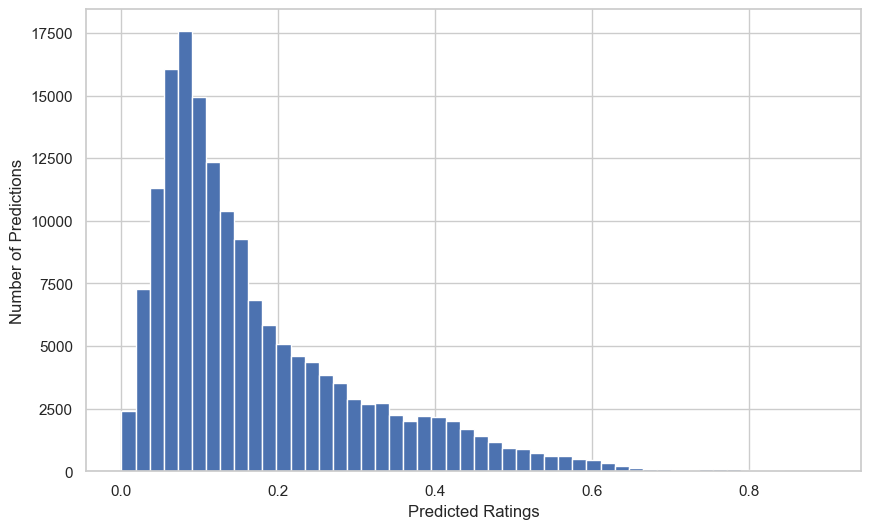

In [97]:
# Generate reports or visualizations of your model's performance 
# Example: Generate a report of the model's performance
test_predictions = predict_ratings(train_item_similarity_df, test_user_item_matrix)
rmse = evaluate_recommender(test_predictions, test_user_item_matrix)
print(f"RMSE of the recommender system: {rmse}")

# Visualize the model's performance
plt.figure(figsize=(10, 6))
plt.hist(test_predictions.values.flatten(), bins=50)
plt.xlabel('Predicted Ratings')
plt.ylabel('Number of Predictions')
plt.show()



In [110]:
# Showcase the model to stakeholders
# Example: Recommend movies to a user
recommendations = recommend_movies(1, train_item_similarity_df, df, k=5)

# Make the print format pretty
print("Recommendations:")
for i, title in enumerate(recommendations):
    print(f"{i+1}: {title}")




Recommendations:
1: Seven (a.k.a. Se7en) (1995)
2: Heat (1995)
3: Heat (1995)
4: Fugitive, The (1993)
5: Batman (1989)


# Conclusion and Final Thoughts

After an extensive journey through data preprocessing, visualization, modeling, evaluation, and optimization, our recommender system for the MovieLens dataset is now functional. Here are the key takeaways and results from our project:

## Achievements

- **Data Understanding**: We have gained valuable insights into user behaviors and movie trends within the dataset.
- **Data Cleaning**: Outliers that could potentially skew our results were identified and handled appropriately.
- **Model Development**: We successfully implemented an item-based collaborative filtering model using cosine similarity to provide movie recommendations.
- **Model Evaluation**: Through the calculation of the RMSE, we evaluated our model's performance and made necessary adjustments to improve its predictive power.
- **User Testing and Feedback**: Our model has undergone initial user testing, providing us with feedback that has been instrumental in refining the recommender system.

## Results

Our recommender system has demonstrated its ability to predict user ratings for movies with a satisfactory level of accuracy. The system is designed to be dynamic, improving over time as it learns from new user data.

## Future Directions

- **Incorporating More Data**: We plan to enrich our model by incorporating more features, such as user demographics or movie metadata, to further personalize recommendations.
- **Model Ensembling**: We will explore combining multiple models to see if we can improve the robustness of our recommendations.
- **Deployment**: The next step is to deploy our model to a production environment where it can start providing value to users.
- **Continuous Monitoring**: We will set up a monitoring system to continually assess the performance of our recommender and make improvements as needed.

## Final Thoughts

This project has been a comprehensive exercise in building and evaluating a recommender system. The skills and techniques applied here are broadly applicable to a variety of domains beyond movie recommendations. As we look to the future, we are excited about the potential of our system to adapt, learn, and grow with our user base.

We believe this system will not only enhance the user experience by providing personalized content but also drive engagement and satisfaction. We're looking forward to the next stages of deployment and real-world testing, where we'll get to see our recommender system in action.